# Perx Technologies Test for Data Scientist Candidate

## Name of Candidate : Reyki Seprianza

## Subject: Recomendation Engine for Movies
>*Details

### Use Case
- Client X would like to understand its customers behaviour to recommend relevant rewards for future campaigns.
### Specification
- Create a working machine learning (unsupervised model) solution that recommend rewards when input a user_id.
- You are free to use any Python framework including tensorflow, Keras, scikit-learn and pytorch.
### Data Provided
- Please use the public [movielens 1M dataset](https://grouplens.org/datasets/movielens/1m)
### Deliverable
- A command line application that can be invoked with user_id as parameter and output recommended movie ids. Or a simple REST service that is packaged as docker image that expose a simple rest API that returns recommended movie ids for a user specified.

- Bonus point: recommended to have a orchestration application, either localhost or docker, to help update the data as well as retrain the model and finally update to the latest model in order to support the recommendation machenism within, which links to the core application itself. Draft CI/CD architecture for this application then.


## Data Exploration:

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
# from tensorflow.keras.layers import Input, Embedding, Dot, Flatten
# from tensorflow.keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from keras.models import Model


In [111]:
# Define file paths
ratings_file = "ratings.dat"
users_file = "users.dat"
movies_file = "movies.dat"

# Define column names for each dataset
ratings_cols = ["UserID", "MovieID", "Rating", "Timestamp"]
users_cols = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]
movies_cols = ["MovieID", "Title", "Genres"]
# Load datasets into DataFrames with latin1 encoding
ratings_df = pd.read_csv(ratings_file, sep="::", header=None, names=ratings_cols, engine="python", encoding="latin1")
users_df = pd.read_csv(users_file, sep="::", header=None, names=users_cols, engine="python", encoding="latin1")
movies_df = pd.read_csv(movies_file, sep="::", header=None, names=movies_cols, engine="python", encoding="latin1")
# Display the first few rows of each DataFrame to verify import
print("Ratings DataFrame:")
print(ratings_df.head())
print("\nUsers DataFrame:")
print(users_df.head())
print("\nMovies DataFrame:")
print(movies_df.head())


Ratings DataFrame:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Users DataFrame:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

Movies DataFrame:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Com

In [112]:
# Display dimensions of each DataFrame
print("Dimensions of Ratings DataFrame:", ratings_df.shape)
print("Dimensions of Users DataFrame:", users_df.shape)
print("Dimensions of Movies DataFrame:", movies_df.shape)


Dimensions of Ratings DataFrame: (1000209, 4)
Dimensions of Users DataFrame: (6040, 5)
Dimensions of Movies DataFrame: (3883, 3)


In [113]:

# Display first few rows of each DataFrame
print("\nFirst few rows of Ratings DataFrame:")
print(ratings_df.head())
print("\nFirst few rows of Users DataFrame:")
print(users_df.head())
print("\nFirst few rows of Movies DataFrame:")
print(movies_df.head())



First few rows of Ratings DataFrame:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

First few rows of Users DataFrame:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

First few rows of Movies DataFrame:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father

In [114]:

# Check for missing values
print("\nMissing values in Ratings DataFrame:")
print(ratings_df.isnull().sum())
print("\nMissing values in Users DataFrame:")
print(users_df.isnull().sum())
print("\nMissing values in Movies DataFrame:")
print(movies_df.isnull().sum())



Missing values in Ratings DataFrame:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Missing values in Users DataFrame:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Missing values in Movies DataFrame:
MovieID    0
Title      0
Genres     0
dtype: int64


In [115]:

# Summary statistics for numerical columns
print("\nSummary statistics for Ratings DataFrame:")
print(ratings_df.describe())
print("\nSummary statistics for Users DataFrame:")
print(users_df.describe())



Summary statistics for Ratings DataFrame:
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09

Summary statistics for Users DataFrame:
            UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.00000

In [116]:

# Unique values and value counts for categorical columns
print("\nUnique values of Gender in Users DataFrame:")
print(users_df['Gender'].unique())
print("\nValue counts of Age in Users DataFrame:")
print(users_df['Age'].value_counts())
print("\nValue counts of Occupation in Users DataFrame:")
print(users_df['Occupation'].value_counts())


Unique values of Gender in Users DataFrame:
['F' 'M']

Value counts of Age in Users DataFrame:
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

Value counts of Occupation in Users DataFrame:
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: Occupation, dtype: int64


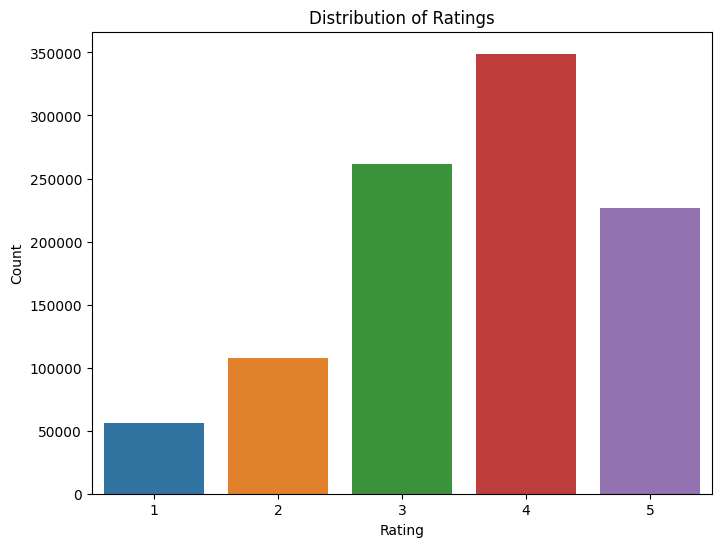

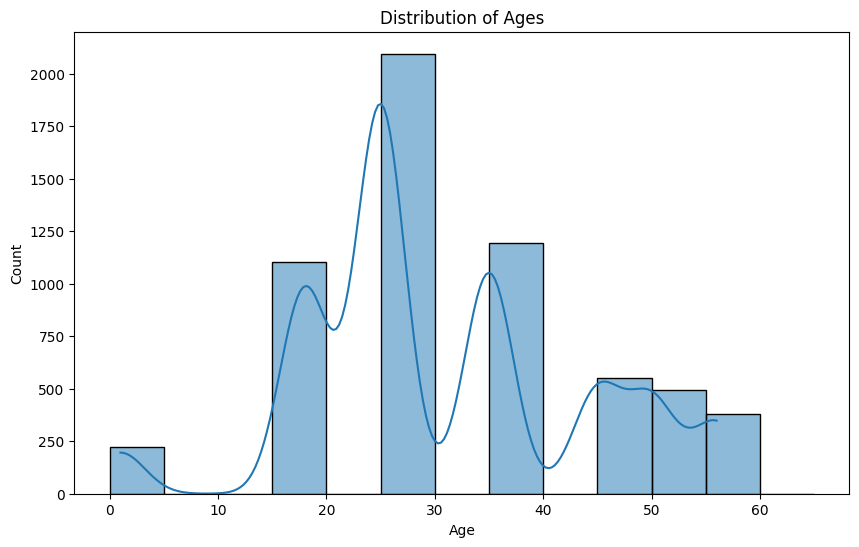

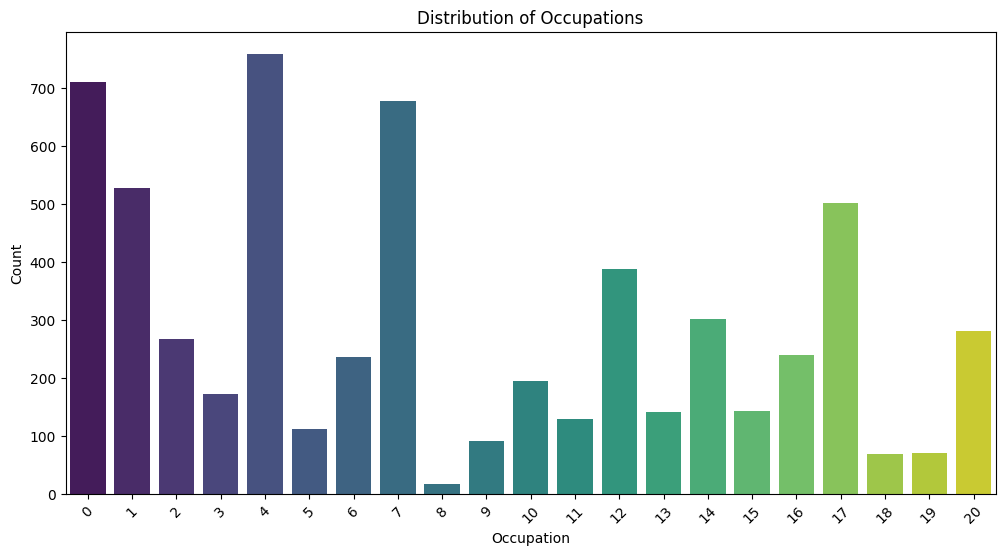

In [117]:

# Visualization
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=ratings_df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(data=users_df, x='Age', bins=range(0, 70, 5), kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Occupations
plt.figure(figsize=(12, 6))
sns.countplot(data=users_df, x='Occupation', palette='viridis')
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing:
- merge dataset
- feature engineering for genre column
- One Hot Encoding for gender and genre

In [118]:

# Merge datasets
merged_df = pd.merge(ratings_df, users_df, on="UserID")
merged_df = pd.merge(merged_df, movies_df, on="MovieID")



In [119]:
merged_df.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres'],
      dtype='object')

In [120]:
# Encode categorical variables
# Perform one-hot encoding for gender
encoded_gender = pd.get_dummies(merged_df['Gender'], prefix='Gender')

# Concatenate the encoded gender columns with the original DataFrame
merged_df_encoded = pd.concat([merged_df, encoded_gender], axis=1)

# Drop the original gender column
merged_df_encoded.drop('Gender', axis=1, inplace=True)

In [121]:
merged_df_encoded

,UserID,MovieID,Rating,Timestamp,Age,Occupation,Zip-code,Title,Genres,Gender_F,Gender_M
0,1,1193,5,978300760,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1,0
1,2,1193,5,978298413,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,0,1
2,12,1193,4,978220179,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,0,1
3,15,1193,4,978199279,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,0,1
4,17,1193,5,978158471,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,18,17,47901,Modulations (1998),Documentary,0,1
1000205,5675,2703,3,976029116,35,14,30030,Broken Vessels (1998),Drama,0,1
1000206,5780,2845,1,958153068,18,17,92886,White Boys (1999),Drama,0,1
1000207,5851,3607,5,957756608,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,1,0


In [122]:
# Split genres and count the number of genres for each row
merged_df_encoded['Num_Genres'] = merged_df_encoded['Genres'].str.split('|').apply(len)

# Find the maximum number of genres across all rows
max_num_genres = merged_df_encoded['Num_Genres'].max()

print("Maximum number of genres in a single row:", max_num_genres)


Maximum number of genres in a single row: 6


In [123]:
# Split genres and create a list of all genres
all_genres = merged_df_encoded['Genres'].str.split('|').tolist()
# Flatten the list of lists into a single list
all_genres_flat = [genre for sublist in all_genres for genre in sublist]
# Get unique genres
unique_genres = set(all_genres_flat)
# Print unique genres
print("Unique Genres:")
for genre in unique_genres:
    print(genre)


Unique Genres:
Comedy
Musical
Drama
Children's
Sci-Fi
Crime
Animation
Fantasy
War
Mystery
Western
Action
Horror
Romance
Film-Noir
Documentary
Adventure
Thriller


In [124]:
# Split genres and find all unique genre names
genres_split = merged_df_encoded['Genres'].str.split('|', expand=True)
unique_genres = genres_split.stack().unique()

# Create new columns for each unique genre
for genre in unique_genres:
    merged_df_encoded[genre] = genres_split.apply(lambda x: 1 if genre in x.values else 0, axis=1)

# Drop the original 'Genres' column
merged_df_encoded.drop('Genres', axis=1, inplace=True)

# Display the updated dataframe
print(merged_df_encoded.head())


   UserID  MovieID  Rating  Timestamp  Age  Occupation Zip-code  \
0       1     1193       5  978300760    1          10    48067   
1       2     1193       5  978298413   56          16    70072   
2      12     1193       4  978220179   25          12    32793   
3      15     1193       4  978199279   25           7    22903   
4      17     1193       5  978158471   50           1    95350   

                                    Title  Gender_F  Gender_M  ...  Fantasy  \
0  One Flew Over the Cuckoo's Nest (1975)         1         0  ...        0   
1  One Flew Over the Cuckoo's Nest (1975)         0         1  ...        0   
2  One Flew Over the Cuckoo's Nest (1975)         0         1  ...        0   
3  One Flew Over the Cuckoo's Nest (1975)         0         1  ...        0   
4  One Flew Over the Cuckoo's Nest (1975)         0         1  ...        0   

   Sci-Fi  War  Thriller  Crime  Mystery  Western  Horror  Film-Noir  \
0       0    0         0      0        0        0 

In [125]:
merged_df_encoded.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Age', 'Occupation',
       'Zip-code', 'Title', 'Gender_F', 'Gender_M', 'Num_Genres', 'Drama',
       'Animation', 'Children's', 'Musical', 'Romance', 'Comedy', 'Action',
       'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime', 'Mystery',
       'Western', 'Horror', 'Film-Noir', 'Documentary'],
      dtype='object')

In [126]:
# Assuming merged_df_encoded has been loaded and contains genre columns
genre_columns = ['Drama', 'Animation', "Children's", 'Musical', 'Romance', 
                 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 
                 'War', 'Thriller', 'Crime', 'Mystery', 'Western', 
                 'Horror', 'Film-Noir', 'Documentary']


# Deep Learning: collaborative filtering
- Recommendation for a specific user: This model provides personalized recommendations based on the user's past ratings and preferences.

In [128]:
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming `merged_df_encoded` is already loaded

# Define input layers
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')
genre_input = Input(shape=(18,), name='genre_input')  # Assuming genre_columns is a list of genre names

# Define embedding layers with +1 to accommodate the entire range of indices
num_users = merged_df_encoded['UserID'].nunique()
num_movies = merged_df_encoded['MovieID'].nunique()
max_user_id = merged_df_encoded['UserID'].max()
max_movie_id = merged_df_encoded['MovieID'].max()
embedding_size = 50  # Define the embedding size

user_embedding = Embedding(input_dim=max_user_id + 1, output_dim=embedding_size, name='user_embedding')(user_input)
movie_embedding = Embedding(input_dim=max_movie_id + 1, output_dim=embedding_size, name='movie_embedding')(movie_input)

# Flatten embedding layers
user_flat = Flatten()(user_embedding)
movie_flat = Flatten()(movie_embedding)

# Concatenate user, movie, and genre embeddings
concatenated = Concatenate()([user_flat, movie_flat, genre_input])

# Add dense layers for non-linear interactions
dense1 = Dense(128, activation='relu')(concatenated)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1)(dense2)

# Update the model definition to include the genre input layer
model = Model(inputs=[user_input, movie_input, genre_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()



Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 50)        302050      ['user_input[0][0]']             
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 50)        197650      ['movie_input[0][0]']            
                                                                                           

In [129]:
genre_columns

['Drama',
 'Animation',
 "Children's",
 'Musical',
 'Romance',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'War',
 'Thriller',
 'Crime',
 'Mystery',
 'Western',
 'Horror',
 'Film-Noir',
 'Documentary']

In [130]:

# Split data into train and test sets
train_df, test_df = train_test_split(merged_df_encoded, test_size=0.2, random_state=42)

# Train the model
history = model.fit([train_df['UserID'], train_df['MovieID'], train_df[genre_columns]], train_df['Rating'], 
                    epochs=5, batch_size=128, 
                    validation_data=([test_df['UserID'], test_df['MovieID'], test_df[genre_columns]], test_df['Rating']))

# Evaluate the model
loss = model.evaluate([test_df['UserID'], test_df['MovieID'], test_df[genre_columns]], test_df['Rating'])
print("Test Loss:", loss)

Epoch 1/5
6252/6252 [==============================] - 34s 5ms/step - loss: 0.8905 - val_loss: 0.8033
Epoch 2/5
6252/6252 [==============================] - 33s 5ms/step - loss: 0.7583 - val_loss: 0.7642
Epoch 3/5
6252/6252 [==============================] - 33s 5ms/step - loss: 0.7116 - val_loss: 0.7593
Epoch 4/5
6252/6252 [==============================] - 36s 6ms/step - loss: 0.6755 - val_loss: 0.7530
Epoch 5/5
6252/6252 [==============================] - 6s 880us/step - loss: 0.7543
Test Loss: 0.7543381452560425


# Traditional methods using Average Rating
-  Recommendation for a not-logged-in user: This model provides recommendations without relying on a specific user's history, often using general popularity or genre preferences.

In [140]:

# Overall Popularity-Based Recommendation Model
def overall_popularity_recommendation():
    # Calculate the average rating for each movie
    movie_avg_ratings = merged_df_encoded.groupby('MovieID')['Rating'].mean()

    # Merge with movie information to obtain movie names and genres
    movie_info = movies_df[['MovieID', 'Title', 'Genres']]
    top_movies_overall = movie_avg_ratings.to_frame(name='Average Rating').reset_index()
    top_movies_overall = pd.merge(top_movies_overall, movie_info, on='MovieID', how='left')

    # Sort movies by average rating in descending order
    top_movies_overall = top_movies_overall.sort_values(by='Average Rating', ascending=False).head(10)

    return top_movies_overall



# Traditional methode enhance with zip-code
- Recommendation for users in a specific area: This model tailors recommendations based on the location (zip code) of the user, possibly reflecting regional preferences or trends.

In [141]:

# Location-Based Popularity Recommendation Model
def location_based_popularity_recommendation(zip_code):
    # Filter ratings by users in the specified zip code
    user_ids_in_zip_code = users_df[users_df['Zip-code'] == zip_code]['UserID']
    ratings_in_zip_code = merged_df_encoded[merged_df_encoded['UserID'].isin(user_ids_in_zip_code)]

    # Calculate the average rating for each movie in the specified zip code
    movie_avg_ratings_zip = ratings_in_zip_code.groupby('MovieID')['Rating'].mean()

    # Merge with movie information to obtain movie names and genres
    movie_info = movies_df[['MovieID', 'Title', 'Genres']]
    top_movies_zip = movie_avg_ratings_zip.to_frame(name='Average Rating').reset_index()
    top_movies_zip = pd.merge(top_movies_zip, movie_info, on='MovieID', how='left')

    # Sort movies by average rating in descending order
    top_movies_zip = top_movies_zip.sort_values(by='Average Rating', ascending=False).head(10)

    return top_movies_zip

# # Example: Location-Based Popularity Recommendations for a specific zip code
# zip_code = '12345'  # Example zip code
# print("\nTop 10 popular movies for users in zip code", zip_code)
# print(location_based_popularity_recommendation(zip_code))


# How to use the model

### Deep Learning

In [142]:
import numpy as np
#assume input user id are
user_id=8

user_movies = merged_df_encoded[merged_df_encoded['UserID'] == user_id]['MovieID'].unique()
user_unrated_movies = merged_df_encoded[~merged_df_encoded['MovieID'].isin(user_movies)]['MovieID'].unique()
# Repeat the user ID for all unrated movies
user_ids = np.array([user_id] * len(user_unrated_movies))

# Ensure the genre input has the same number of rows as the other inputs
genre_input_data = np.zeros((len(user_unrated_movies), len(genre_columns)))

# Predict ratings for unrated movies
user_recommendations = model.predict([user_ids.reshape(-1, 1), user_unrated_movies.reshape(-1, 1), genre_input_data])

# Create a DataFrame with movie IDs and recommendation scores
user_recommendations_df = pd.DataFrame({'MovieID': user_unrated_movies, 'Recommendation Score': user_recommendations.flatten()})

# Sort recommendations by score in descending order
user_recommendations_df = user_recommendations_df.sort_values(by='Recommendation Score', ascending=False)
# Merge recommendations DataFrame with movies DataFrame
recommended_movies_df = pd.merge(user_recommendations_df, movies_df, on='MovieID', how='left')

# Print top recommended movies with their names and genres
print("Top 10 recommended movies for User", user_id)
print(recommended_movies_df[['Title', 'Genres', 'Recommendation Score']].head(10))



115/115 [==============================] - 0s 1ms/step
Top 10 recommended movies for User 8
                          Title                Genres  Recommendation Score
0     This Is Spinal Tap (1984)  Comedy|Drama|Musical              4.706374
1  Palm Beach Story, The (1942)                Comedy              4.700954
2           General, The (1927)                Comedy              4.690494
3     Young Frankenstein (1974)         Comedy|Horror              4.662841
4    Usual Suspects, The (1995)        Crime|Thriller              4.646956
5           Ghostbusters (1984)         Comedy|Horror              4.646878
6         Ed's Next Move (1996)                Comedy              4.607678
7                   Jaws (1975)         Action|Horror              4.592065
8         Quiet Man, The (1952)        Comedy|Romance              4.583557
9  It Happened One Night (1934)                Comedy              4.571684


### Recommendation for a not-logged-in user

In [146]:

# Example: Overall Popularity-Based Recommendations
# this will work as dataset file mean
print("Top 10 overall popular movies:")
print(overall_popularity_recommendation())

Top 10 overall popular movies:
      MovieID  Average Rating                                      Title  \
926       989             5.0  Schlafes Bruder (Brother of Sleep) (1995)   
3635     3881             5.0                   Bittersweet Motel (2000)   
1652     1830             5.0                    Follow the Bitch (1998)   
3152     3382             5.0                     Song of Freedom (1936)   
744       787             5.0         Gate of Heavenly Peace, The (1995)   
3054     3280             5.0                           Baby, The (1973)   
3367     3607             5.0                   One Little Indian (1973)   
3010     3233             5.0                       Smashing Time (1967)   
2955     3172             5.0                    Ulysses (Ulisse) (1954)   
3414     3656             5.0                               Lured (1947)   

                    Genres  
926                  Drama  
3635           Documentary  
1652                Comedy  
3152            

### Recommendation for users in a specific area

In [147]:
# the zip code must be contain in dataset
merged_df_encoded['Zip-code'].unique()

array(['48067', '70072', '32793', ..., '74403', '79401', '77662'],
      dtype=object)

In [148]:
# Example: Location-Based Popularity Recommendations for a specific zip code
zip_code = '74403'  # Example zip code
print("\nTop 10 popular movies for users in zip code", zip_code)
print(location_based_popularity_recommendation(zip_code))


Top 10 popular movies for users in zip code 74403
    MovieID  Average Rating                                      Title  \
20     3917             5.0                          Hellraiser (1987)   
1       366             5.0          Wes Craven's New Nightmare (1994)   
15     2710             5.0            Blair Witch Project, The (1999)   
3      1219             5.0                              Psycho (1960)   
5      1261             5.0         Evil Dead II (Dead By Dawn) (1987)   
6      1321             5.0     American Werewolf in London, An (1981)   
13     1994             5.0                         Poltergeist (1982)   
8      1347             5.0          Nightmare on Elm Street, A (1984)   
12     1973             5.0  Freddy's Dead: The Final Nightmare (1991)   
14     2455             4.0                            Fly, The (1986)   

                            Genres  
20                          Horror  
1                           Horror  
15                     

### Prepare for local deployment

In [152]:
# pip install flask

     ------------------------------------ 101.3/101.3 kB 364.2 kB/s eta 0:00:00
     ------------------------------------ 226.7/226.7 kB 865.7 kB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.4
    Uninstalling Werkzeug-2.3.4:
      Successfully uninstalled Werkzeug-2.3.4
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Extract model 1

In [149]:
# Assuming `model` is your trained Keras model
model.save('model_dl')


INFO:tensorflow:Assets written to: path_to_save_model\assets


INFO:tensorflow:Assets written to: path_to_save_model\assets


### export df to use

In [150]:
#export df to use
# Export merged_df_encoded to CSV
merged_df_encoded.to_csv('merged_df_encoded.csv', index=False)

# Export movies_df to CSV
movies_df.to_csv('movies_df.csv', index=False)

# Export users_df to CSV
users_df.to_csv('users_df.csv', index=False)

# Print a message indicating successful export
print("Dataframes exported successfully.")

Dataframes exported successfully.


# Summary
1. Recommendation for a specific user: This model provides personalized recommendations based on the user's past ratings and preferences.
    - **Tailored Models**: Each recommendation model is tailored to meet specific objectives and user preferences, aligning with our overarching goal of enhancing user experience and satisfaction.


2. Recommendation for a not-logged-in user: This model provides recommendations without relying on a specific user's history, often using general popularity or genre preferences.
    - **Personalized Recommendations**: Our models provide personalized and relevant recommendations, leveraging users' historical interactions and preferences to deliver a highly curated and engaging movie-watching experience.

3. Recommendation for users in a specific area: This model tailors recommendations based on the location (zip code) of the user, possibly reflecting regional preferences or trends.
    - **Optimized User Satisfaction**: Adopting this strategy enables us to optimize user satisfaction and retention, ultimately driving the success and growth of our recommendation system.

  

  
